In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [14]:
data=pd.read_csv("C:/Users/HARSHITA BUDHORI/Downloads/Student_performance_data _.csv")

In [15]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [17]:
data.drop(['StudentID'],axis=1,inplace=True)

In [18]:
cat_col=data.columns.drop(['StudyTimeWeekly','GPA'])
for i in cat_col:
    print(data[i].value_counts(),'\n'*2,'*'*50,'\n')

15    630
16    593
17    587
18    582
Name: Age, dtype: int64 

 ************************************************** 

1    1222
0    1170
Name: Gender, dtype: int64 

 ************************************************** 

0    1207
1     493
2     470
3     222
Name: Ethnicity, dtype: int64 

 ************************************************** 

2    934
1    728
3    367
0    243
4    120
Name: ParentalEducation, dtype: int64 

 ************************************************** 

25    93
13    93
12    92
8     91
19    90
20    90
6     88
15    87
23    86
7     86
1     85
27    84
14    84
5     83
21    83
17    81
24    81
26    80
3     79
16    79
18    79
11    71
22    71
2     69
29    69
4     69
0     67
9     67
10    61
28    54
Name: Absences, dtype: int64 

 ************************************************** 

0    1671
1     721
Name: Tutoring, dtype: int64 

 ************************************************** 

2    740
3    697
1    489
4    254
0    212
Name: P

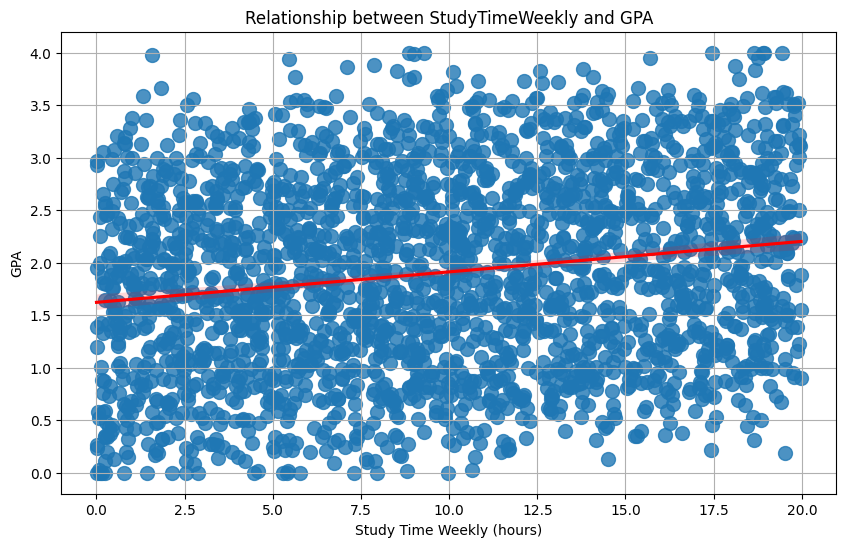

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='StudyTimeWeekly', y='GPA', scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Relationship between StudyTimeWeekly and GPA')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

<Axes: xlabel='StudyTimeWeekly', ylabel='Count'>

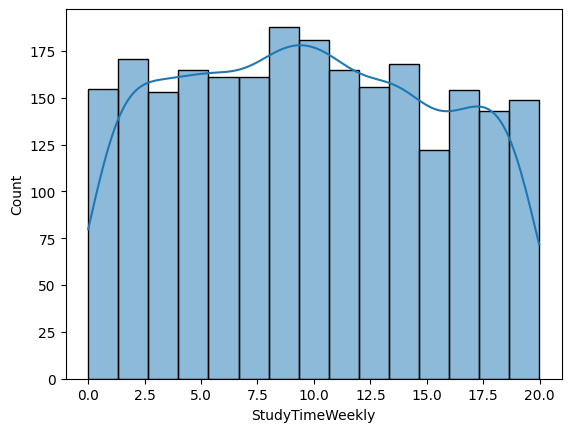

In [24]:
sns.histplot(data=data,x='StudyTimeWeekly',kde=True)

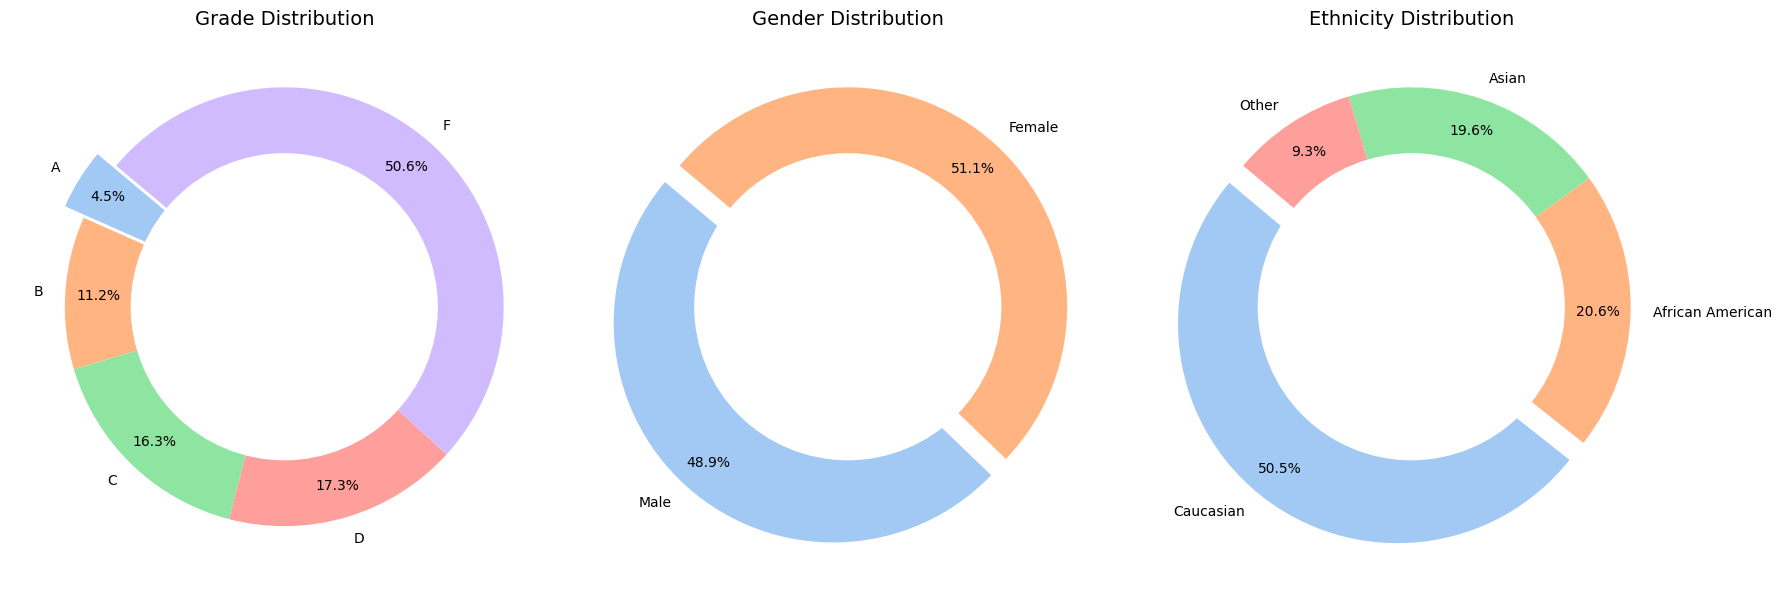

In [26]:
colors = sns.color_palette('pastel')

def plot_pie(ax, data, column, labels, title):
    counts = data[column].value_counts().sort_index()
    sizes = counts.values
    ax.pie(sizes, labels=labels, colors=colors[:len(labels)], autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=[0.1] + [0]*(len(labels)-1))
    ax.set_title(title, fontsize=14)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_pie(axes[0], data, 'GradeClass', ['A', 'B', 'C', 'D', 'F'], 'Grade Distribution')
plot_pie(axes[1], data, 'Gender', ['Male', 'Female'], 'Gender Distribution')
plot_pie(axes[2], data, 'Ethnicity', ['Caucasian', 'African American', 'Asian', 'Other'], 'Ethnicity Distribution')
plt.tight_layout()

plt.show()

In [27]:
corr=data.corr()

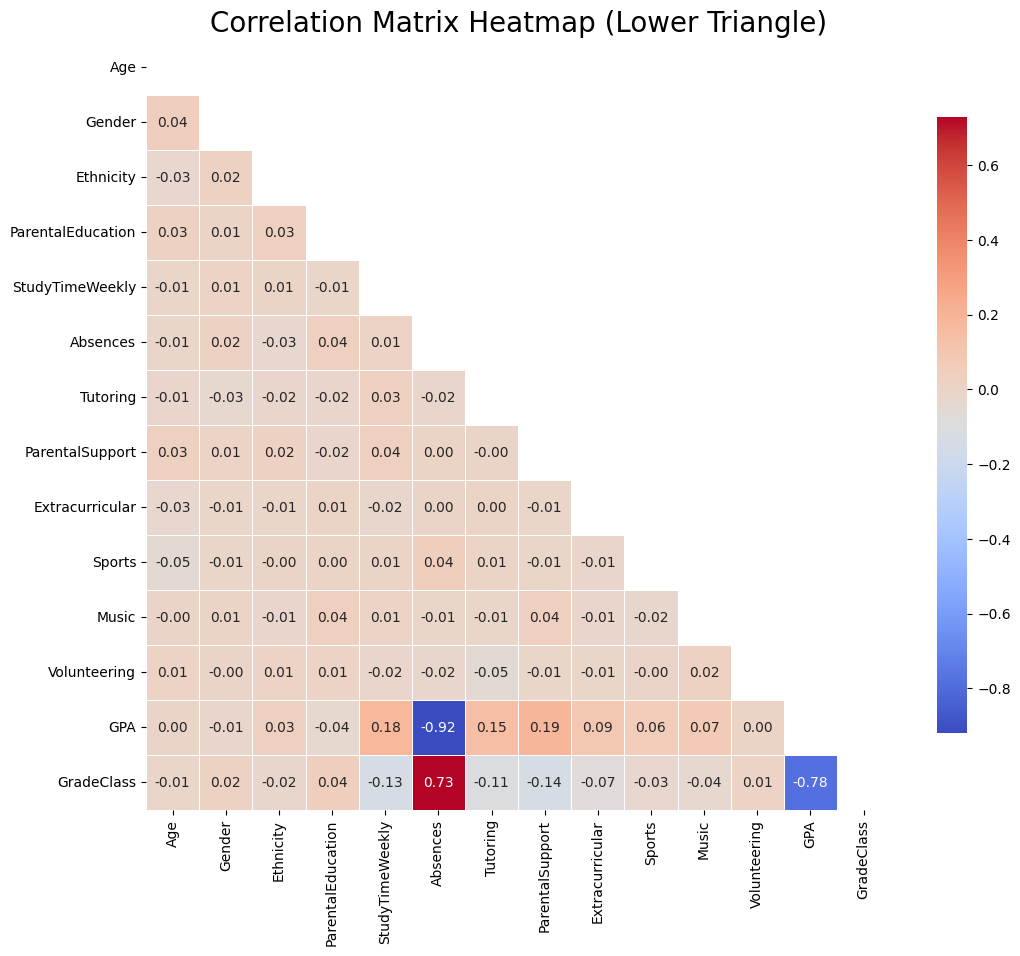

In [28]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix Heatmap (Lower Triangle)', fontsize=20)

plt.show()

In [30]:
weak_corr_cols = corr[abs(corr['GradeClass']) < 0.01].index
data_filtered = data.drop(columns=weak_corr_cols)

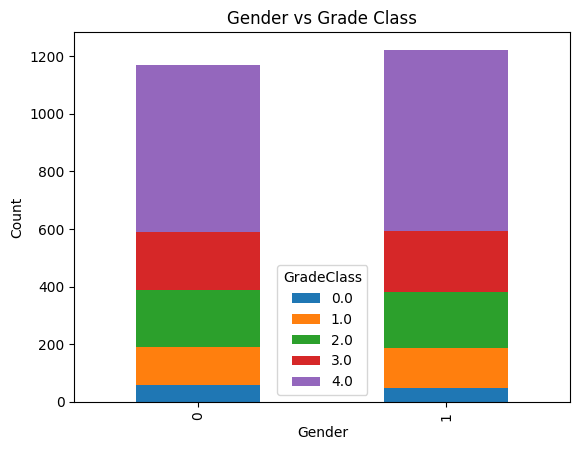

In [32]:
pd.crosstab(data['Gender'], data['GradeClass']).plot(kind='bar', stacked=True)
plt.title('Gender vs Grade Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

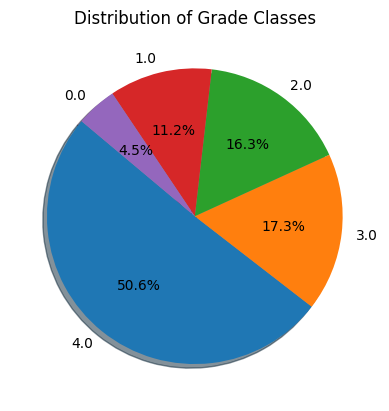

In [34]:
data['GradeClass'].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('Distribution of Grade Classes')
plt.ylabel('') 
plt.show()

In [35]:
x=data.drop('GradeClass',axis=1)
y=data['GradeClass']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,shuffle=True,random_state=15)

In [36]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: {accuracy:.2f}')
    print('**'*10)

C:\Users\HARSHITA BUDHORI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.77
********************
Decision Tree: 0.85
********************
Random Forest: 0.92
********************
SVM: 0.73
********************
KNN: 0.69
********************


In [37]:
random_forest_clf=RandomForestClassifier(n_estimators=200,random_state=15,min_samples_split=5,min_samples_leaf=4,max_features=None)

In [38]:
random_forest_clf.fit(x_train, y_train)
y_pred = random_forest_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9331476323119777

In [39]:
y_TRAIN_pred = random_forest_clf.predict(x_train)
accuracy_score(y_train, y_TRAIN_pred)

0.9289127837514934